In [5]:
import pickle
import numpy as np
from numpy.linalg import norm

import tensorflow as tf

from tensorflow.keras.layers import GlobalMaxPooling2D

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

if tf.test.gpu_device_name():
      print(f'Default GPU Device: {tf.test.gpu_device_name()}')

model = VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
model.trainable = False

In [6]:
feature_list = pickle.load(open('embeddings.pkl', 'rb'))

filenames = pickle.load(open('file_names_full.pkl', 'rb'))

In [7]:
np.shape(feature_list)

(1000, 512)

In [8]:
model_seq = tf.keras.Sequential([
      model,
      GlobalMaxPooling2D() #Our top layer
])

In [24]:
img_path = '..\\New_test\\0485539040.jpg'

img_file = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img_file)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
predicted_output = model_seq.predict(preprocessed_img)
one_dim_output = predicted_output.flatten()
output = one_dim_output/norm(one_dim_output)

1/1 [==============================] - 0s 112ms/step


In [10]:
from sklearn.neighbors import NearestNeighbors

In [25]:
neighbors = NearestNeighbors(n_neighbors = 5, algorithm='brute', metric='euclidean')

neighbors.fit(feature_list)

distances, indices = neighbors.kneighbors([output])

In [26]:
for file in indices[0]:
    print(filenames[file])

0577648002.jpg
0600914002.jpg
0624851001.jpg
0879096004.jpg
0772711010.jpg


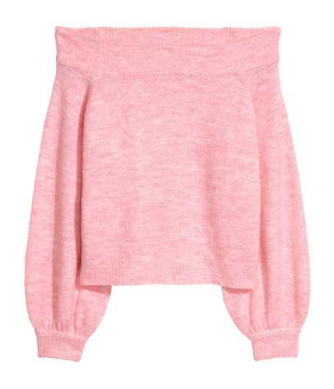

In [29]:

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

all_articles = []

test_images_loc = '..\\New_test\\0485539040.jpg'
location_of_images = os.path.join('..\\Test_all', '0577648002.jpg')#os.path.join(location_of_subfolders, folder_name)

# Load the image from image location
img = mpimg.imread(location_of_images)
test_images = mpimg.imread(test_images_loc)

plt.imshow(img)
plt.axis('off')
plt.show()

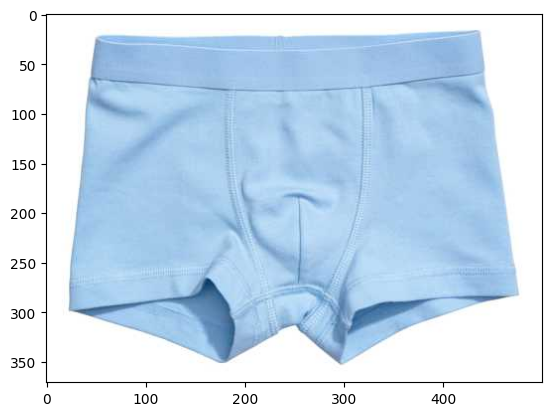

In [30]:
plt.imshow(test_images)